In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm
%matplotlib inline

In [2]:
ecd=pd.read_excel("Ecommerce - UK Retailer.xlsx")

In [3]:
ecd

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-01-12 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-01-12 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-01-12 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-01-12 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-01-12 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-09-12 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-09-12 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-09-12 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-09-12 12:50:00,4.15,12680.0,France


In [4]:
ecd.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [5]:
ecd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [6]:
ecd.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [7]:
ecd.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

# Problem Statements: 

## 1. Perform Basic EDA 

### a. Boxplot – All Numeric Variables 

<AxesSubplot:>

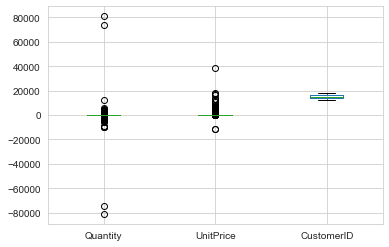

In [46]:
ecd.boxplot(column=["Quantity","UnitPrice","CustomerID"])

### b. Histogram – All Numeric Variables 

Text(0.5, 0, 'Quantity')

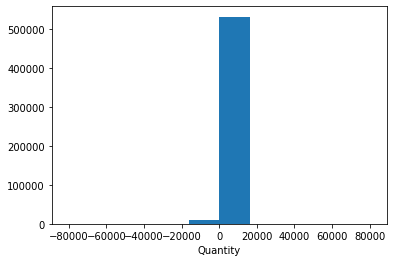

In [12]:
plt.hist(ecd['Quantity'])
plt.xlabel('Quantity')

Text(0.5, 0, 'UnitPrice')

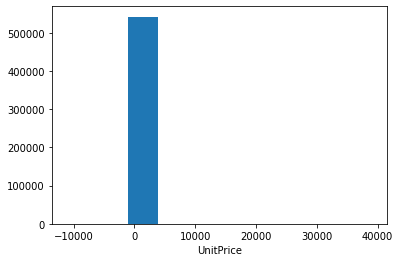

In [13]:
plt.hist(ecd['UnitPrice'])
plt.xlabel('UnitPrice')

Text(0.5, 0, 'CustomerID')

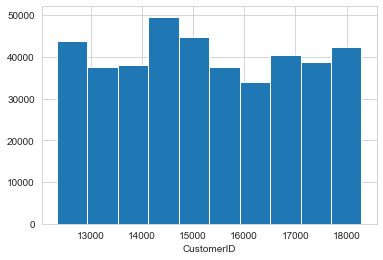

In [47]:
plt.hist(ecd['CustomerID'])
plt.xlabel('CustomerID')

### c. Distribution Plot – All Numeric Variables

C:\Users\91905\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


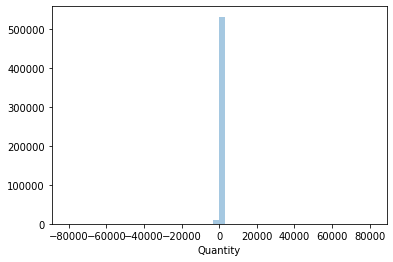

In [15]:
sns.distplot(ecd["Quantity"],kde=False);

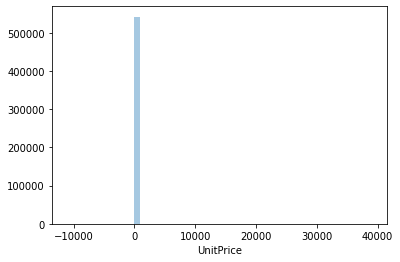

In [16]:
sns.distplot(ecd["UnitPrice"],kde=False);

C:\Users\91905\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


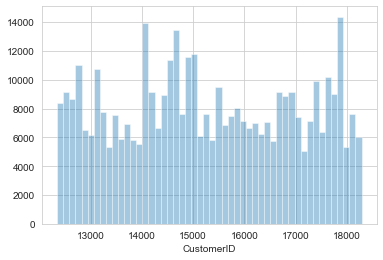

In [48]:
sns.distplot(ecd["CustomerID"],kde=False);

### d. Aggregation for all numerical Columns 

In [32]:
ecd.describe().round(2)

,Quantity,UnitPrice,CustomerID
count,541909.00,541909.00,406829.00
mean,9.55,4.61,15287.69
std,218.08,96.76,1713.60
min,-80995.00,-11062.06,12346.00
25%,1.00,1.25,13953.00
50%,3.00,2.08,15152.00
75%,10.00,4.13,16791.00
max,80995.00,38970.00,18287.00


### e. Unique Values across all columns 

In [20]:
ecd.nunique(axis=0)

InvoiceNo      25900
StockCode       4070
Description     4223
Quantity         722
InvoiceDate    23260
UnitPrice       1630
CustomerID      4372
Country           38
dtype: int64

In [33]:
for col in ecd:
    print(ecd[col].unique())

[536365 536366 536367 ... 581585 581586 581587]
['85123A' 71053 '84406B' ... '90214U' '47591b' 23843]
['WHITE HANGING HEART T-LIGHT HOLDER' 'WHITE METAL LANTERN'
 'CREAM CUPID HEARTS COAT HANGER' ... 'lost'
 'CREAM HANGING HEART T-LIGHT HOLDER' 'PAPER CRAFT , LITTLE BIRDIE']
[     6      8      2     32      3      4     24     12     48     18
     20     36     80     64     10    120     96     23      5      1
     -1     50     40    100    192    432    144    288    -12    -24
     16      9    128     25     30     28      7     56     72    200
    600    480     -6     14     -2     11     33     13     -4     -5
     -7     -3     70    252     60    216    384    -10     27     15
     22     19     17     21     34     47    108     52  -9360    -38
     75    270     42    240     90    320   1824    204     69    -36
   -192   -144    160   2880   1400     39    -48    -50     26   1440
     31     82     78     97     98     35     57    -20    110    -22
    -30    -70

### f. Duplicate values across all columns

In [21]:
ecd[ecd.duplicated()]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
517,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,2010-01-12 11:45:00,1.25,17908.0,United Kingdom
527,536409,22866,HAND WARMER SCOTTY DOG DESIGN,1,2010-01-12 11:45:00,2.10,17908.0,United Kingdom
537,536409,22900,SET 2 TEA TOWELS I LOVE LONDON,1,2010-01-12 11:45:00,2.95,17908.0,United Kingdom
539,536409,22111,SCOTTIE DOG HOT WATER BOTTLE,1,2010-01-12 11:45:00,4.95,17908.0,United Kingdom
555,536412,22327,ROUND SNACK BOXES SET OF 4 SKULLS,1,2010-01-12 11:49:00,2.95,17920.0,United Kingdom
...,...,...,...,...,...,...,...,...
541675,581538,22068,BLACK PIRATE TREASURE CHEST,1,2011-09-12 11:34:00,0.39,14446.0,United Kingdom
541689,581538,23318,BOX OF 6 MINI VINTAGE CRACKERS,1,2011-09-12 11:34:00,2.49,14446.0,United Kingdom
541692,581538,22992,REVOLVER WOODEN RULER,1,2011-09-12 11:34:00,1.95,14446.0,United Kingdom
541699,581538,22694,WICKER STAR,1,2011-09-12 11:34:00,2.10,14446.0,United Kingdom


### g. Correlation – Heatmap - All Numeric Variables 

In [22]:
p_ecd=ecd.corr()

<AxesSubplot:>

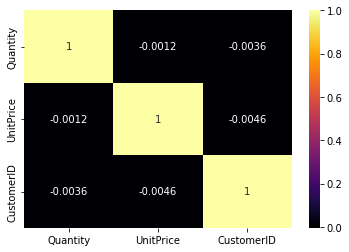

In [23]:
sns.heatmap(p_ecd,cmap='inferno',annot=True)

### h. Regression Plot - All Numeric Variables 

C:\Users\91905\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Quantity', ylabel='UnitPrice'>

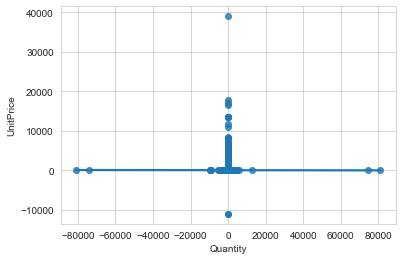

In [36]:
sns.regplot(ecd['Quantity'],ecd['UnitPrice'])

### i. Bar Plot – Every Categorical Variable vs every Numerical Variable 

<AxesSubplot:xlabel='Quantity', ylabel='Country'>

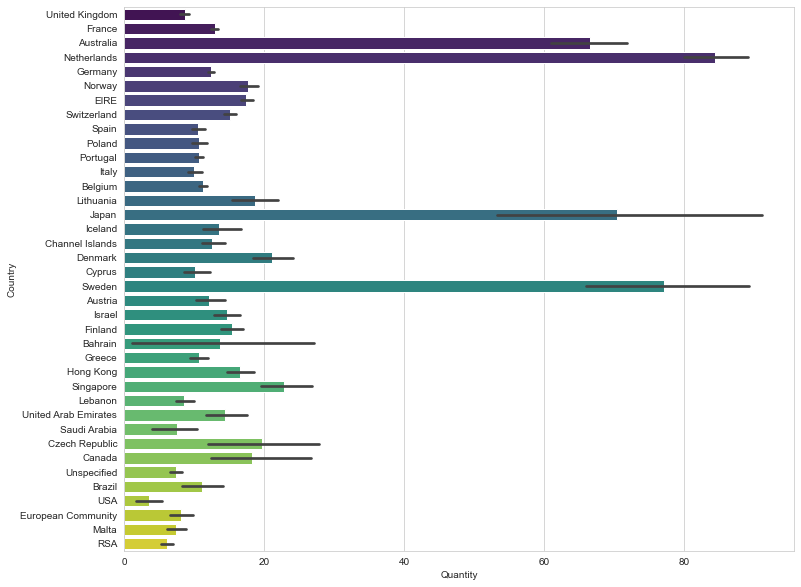

In [58]:
plt.figure(figsize=(12,10))


sns.barplot(data=ecd,y='Country',x='Quantity',palette='viridis')

<AxesSubplot:xlabel='UnitPrice', ylabel='Country'>

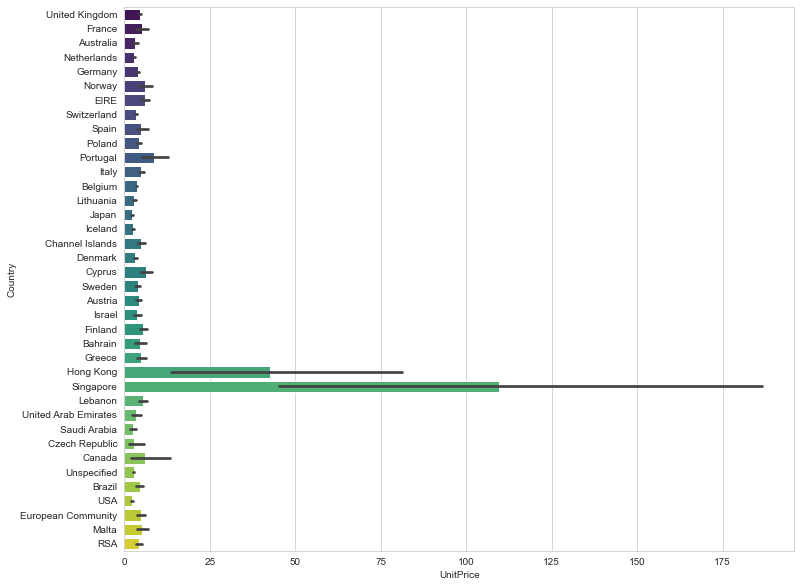

In [53]:
plt.figure(figsize=(12,10))


sns.barplot(data=ecd,y='Country',x='UnitPrice',palette='viridis')

<AxesSubplot:xlabel='CustomerID', ylabel='Country'>

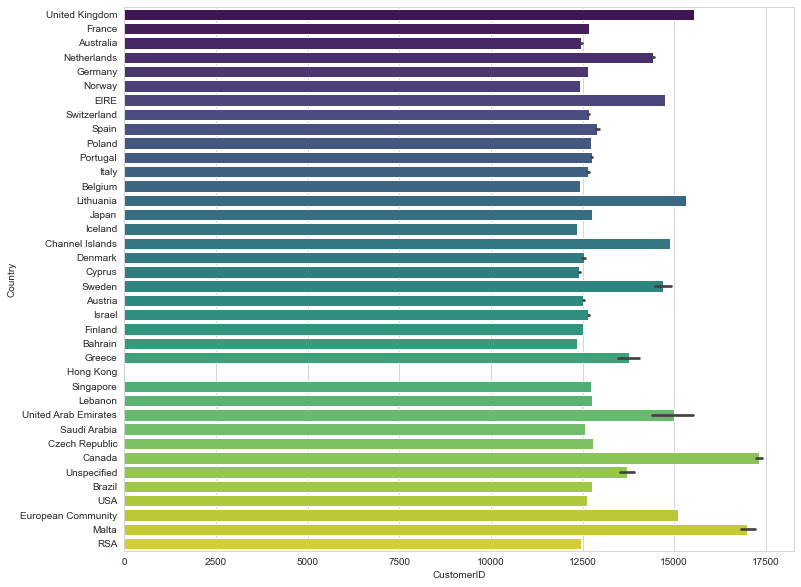

In [54]:
plt.figure(figsize=(12,10))


sns.barplot(data=ecd,y='Country',x='CustomerID',palette='viridis')

### j. Pair plot - All Numeric Variables 

In [92]:
# sns.pairplot(df,vars=['Quantity','UnitPrice'])

# Not Possible

### k. Line chart to show the trend of data - All Numeric/Date Variables

In [93]:
ecd['InvoiceDate']=pd.to_datetime(ecd['InvoiceDate'])

C:\Users\91905\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 0, 'Months')

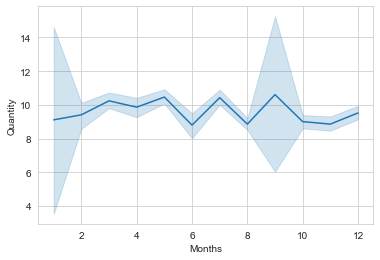

In [94]:
sns.lineplot(ecd['InvoiceDate'].dt.month,ecd['Quantity'])
plt.xlabel('Months')

C:\Users\91905\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 0, 'Months')

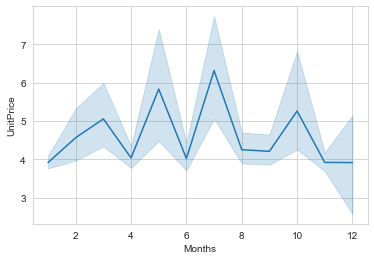

In [95]:
sns.lineplot(ecd['InvoiceDate'].dt.month,ecd['UnitPrice'])
plt.xlabel('Months')

C:\Users\91905\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 0, 'Months')

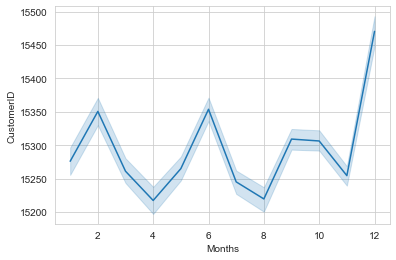

In [96]:
sns.lineplot(ecd['InvoiceDate'].dt.month,ecd['CustomerID'])
plt.xlabel('Months')

### l. Plot the skewness - All Numeric Variables 

C:\Users\91905\AppData\Local\Temp\ipykernel_19976\3834144402.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  sns.histplot(ecd.skew(axis=1,skipna=True),bins=20)


<AxesSubplot:ylabel='Count'>

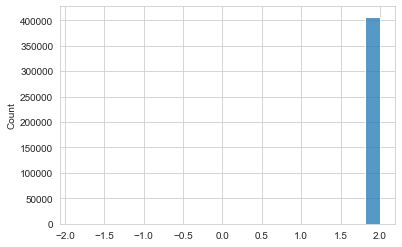

In [102]:
sns.histplot(ecd.skew(axis=1,skipna=True),bins=20)

## 2. Check for missing values in all columns and replace them with the appropriate metric
## (Mean/Median/Mode)

In [109]:
# Checking null values in all columns

ecd.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [111]:
# Replacing missing values in 'Description' with mode  , as it is a categorical variable.

ecd['Description'].fillna(ecd['Description'].mode()[0],inplace=True)

<AxesSubplot:>

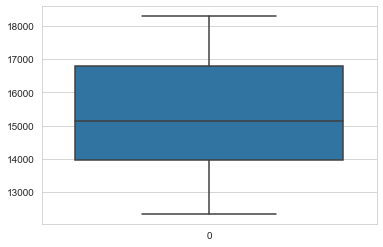

In [113]:
# Checking for outliers in 'CustomerID'

sns.boxplot(data=ecd['CustomerID'])

In [117]:
# As we can see that there are no outliers in 'CustomerID'.
# So we will replace missing values in 'CustomerID' with mean.

ecd['CustomerID'].fillna(ecd['CustomerID'].mean().round(0),inplace=True)

C:\Users\91905\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='UnitPrice', ylabel='Density'>

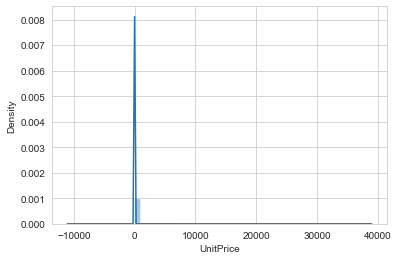

In [127]:
# checking spread of values of 'UnitPrice'

sns.distplot(ecd['UnitPrice'])

In [129]:
# Checking values if '0' in 'UnitPrice'

ecd[ecd['UnitPrice']==0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,WHITE HANGING HEART T-LIGHT HOLDER,56,2010-01-12 11:52:00,0.0,15288.0,United Kingdom
1970,536545,21134,WHITE HANGING HEART T-LIGHT HOLDER,1,2010-01-12 14:32:00,0.0,15288.0,United Kingdom
1971,536546,22145,WHITE HANGING HEART T-LIGHT HOLDER,1,2010-01-12 14:33:00,0.0,15288.0,United Kingdom
1972,536547,37509,WHITE HANGING HEART T-LIGHT HOLDER,1,2010-01-12 14:33:00,0.0,15288.0,United Kingdom
1987,536549,85226A,WHITE HANGING HEART T-LIGHT HOLDER,1,2010-01-12 14:34:00,0.0,15288.0,United Kingdom
...,...,...,...,...,...,...,...,...
536981,581234,72817,WHITE HANGING HEART T-LIGHT HOLDER,27,2011-08-12 10:33:00,0.0,15288.0,United Kingdom
538504,581406,46000M,POLYESTER FILLER PAD 45x45cm,240,2011-08-12 13:58:00,0.0,15288.0,United Kingdom
538505,581406,46000S,POLYESTER FILLER PAD 40x40cm,300,2011-08-12 13:58:00,0.0,15288.0,United Kingdom
538554,581408,85175,WHITE HANGING HEART T-LIGHT HOLDER,20,2011-08-12 14:06:00,0.0,15288.0,United Kingdom


C:\Users\91905\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='UnitPrice'>

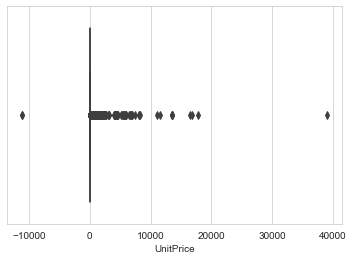

In [130]:
# Checking outliers in 'UnitPrice'

sns.boxplot(ecd['UnitPrice'])

In [132]:
# Replacing missing values in 'UnitPrice' with median , as it contains outliers. 

ecd['UnitPrice'].fillna(ecd['UnitPrice'].median(),inplace=True)

## 3. Remove duplicate rows

In [137]:
ecd.drop(ecd[ecd.duplicated()].index,axis=0,inplace=True)

## 4. Remove rows which have negative values in Quantity column

In [138]:
ecd.drop(ecd[ecd['Quantity']<0].index,axis=0,inplace=True)

## 5. Add the columns - Month, Day and Hour for the invoice

In [139]:
ecd['Month']=ecd['InvoiceDate'].dt.month

ecd['Day']=ecd['InvoiceDate'].dt.day

ecd['Hour']=ecd['InvoiceDate'].dt.hour

## 6. How many orders made by the customers?

In [146]:
ecd.groupby(by=['CustomerID'],as_index=False)['InvoiceNo'].count().head()

,CustomerID,InvoiceNo
0,12346.0,1
1,12347.0,182
2,12348.0,31
3,12349.0,73
4,12350.0,17


Text(0.5, 1.0, 'Number of orders for different customers')

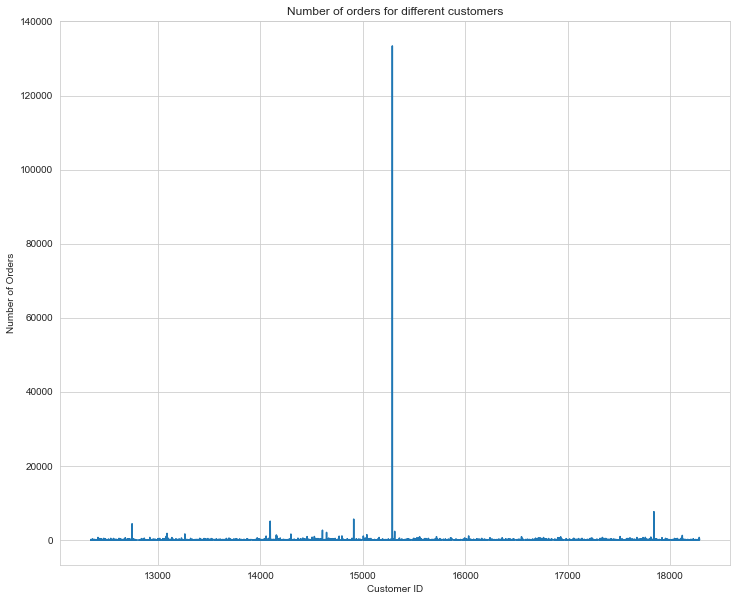

In [153]:
orders=ecd.groupby(by=['CustomerID'],as_index=False)['InvoiceNo'].count()

plt.subplots(figsize=(12,10))
plt.plot(orders['CustomerID'],orders['InvoiceNo'])
plt.xlabel('Customer ID')
plt.ylabel('Number of Orders')
plt.title('Number of orders for different customers')

## 7. TOP 5 customers with higher number of orders

In [154]:
orders['CustomerID']=orders['CustomerID'].astype('int64')

In [156]:
orders.sort_values(by='InvoiceNo',ascending=False).head(5)

,CustomerID,InvoiceNo
2161,15288,133410
4011,17841,7676
1880,14911,5672
1290,14096,5111
326,12748,4413


## 8. How much money spent by the customers? 


In [162]:
ecd['Amount_Spent']=ecd['Quantity']*ecd['UnitPrice']

Text(0.5, 1.0, 'Money Spent by different customers')

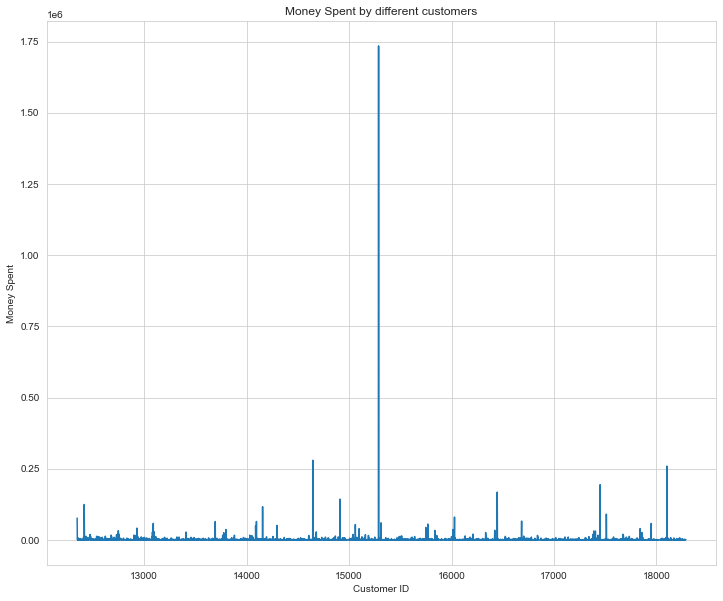

In [176]:
money_spent=ecd.groupby(by=['CustomerID'],as_index=False)['Amount_Spent'].sum()

plt.subplots(figsize=(12,10))
plt.plot(money_spent['CustomerID'],money_spent['Amount_Spent'])
plt.xlabel('Customer ID')
plt.ylabel('Money Spent')
plt.title('Money Spent by different customers')

## 9. TOP 5 customers with highest money spent

In [178]:
money_spent.sort_values(by='Amount_Spent',ascending=False).head(5)

,CustomerID,Amount_Spent
2161,15288.0,1735084.31
1690,14646.0,280206.02
4202,18102.0,259657.30
3729,17450.0,194390.79
3009,16446.0,168472.50


## 10. How many orders per month?

In [180]:
ecd.groupby('Month')['InvoiceNo'].count()

Month
1     38592
2     32968
3     37449
4     36107
5     41462
6     44532
7     45747
8     43608
9     49975
10    55238
11    71421
12    28955
Name: InvoiceNo, dtype: int64

Text(0.5, 1.0, 'Orders by Month')

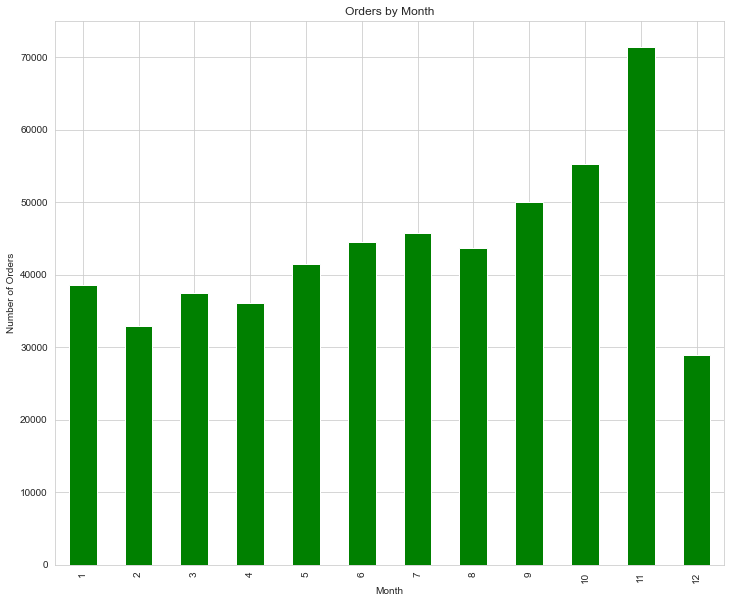

In [224]:
plt.subplots(figsize=(12,10))


ecd.groupby('Month')['InvoiceNo'].count().plot.bar(color='g')
plt.xlabel('Month')
plt.ylabel('Number of Orders')
plt.title('Orders by Month')

## 11. How many orders per day?

In [185]:
ecd.groupby('Day')['InvoiceNo'].count()

Day
1     12547
2     10225
3     12209
4     11876
5     16049
6     14509
7     15069
8     14674
9     16645
10    22725
11    28603
12    50712
13    17845
14    17489
15    15344
16    15217
17    22361
18    18522
19    12757
20    18603
21    18602
22    15785
23    17306
24    16331
25    15797
26    10246
27    14448
28    16676
29    11663
30    15069
31    10150
Name: InvoiceNo, dtype: int64

Text(0.5, 1.0, 'Orders by Day')

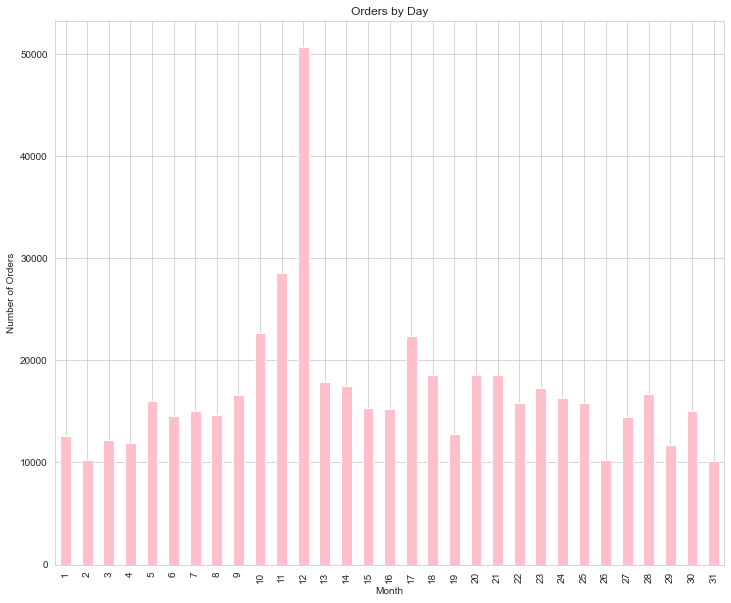

In [228]:
plt.subplots(figsize=(12,10))

ecd.groupby('Day')['InvoiceNo'].count().plot.bar(color='pink')
plt.xlabel('Month')
plt.ylabel('Number of Orders')
plt.title('Orders by Day')

## 12. How many orders per hour?

In [217]:
ecd.groupby('Hour')['InvoiceNo'].count()


Hour
6         1
7       379
8      8802
9     33738
10    47670
11    55592
12    76096
13    70067
14    65384
15    75851
16    53074
17    27498
18     7696
19     3428
20      778
Name: InvoiceNo, dtype: int64

Text(0.5, 1.0, 'Orders by Hour')

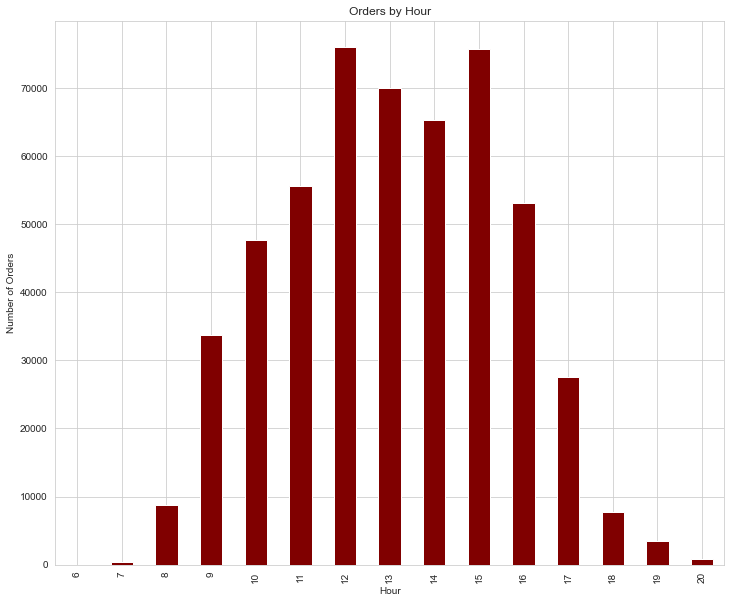

In [229]:
plt.subplots(figsize=(12,10))

ecd.groupby('Hour')['InvoiceNo'].count().plot.bar(color='maroon')
plt.xlabel('Hour')
plt.ylabel('Number of Orders')
plt.title('Orders by Hour')

## 13. How many orders for each country?

In [187]:
ecd.groupby('Country')['InvoiceNo'].count().sort_values(ascending=False)

Country
United Kingdom          481143
Germany                   9027
France                    8393
EIRE                      7883
Spain                     2480
Netherlands               2363
Belgium                   2031
Switzerland               1959
Portugal                  1492
Australia                 1184
Norway                    1072
Italy                      758
Channel Islands            747
Finland                    685
Cyprus                     603
Sweden                     450
Unspecified                442
Austria                    398
Denmark                    380
Poland                     330
Japan                      321
Israel                     292
Hong Kong                  280
Singapore                  222
Iceland                    182
USA                        179
Canada                     151
Greece                     145
Malta                      112
United Arab Emirates        68
European Community          60
RSA                         58


Text(0.5, 1.0, 'Orders by Country')

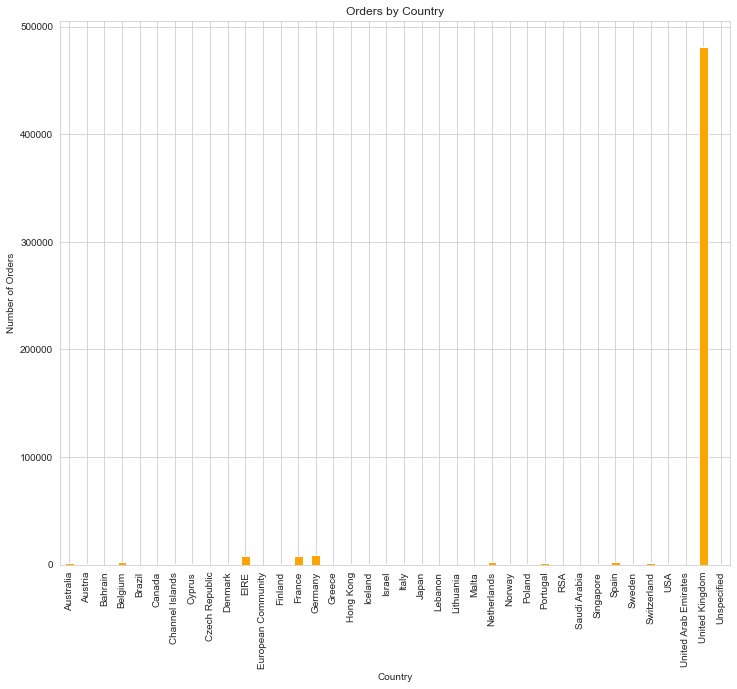

In [231]:
plt.subplots(figsize=(12,10))

ecd.groupby('Country')['InvoiceNo'].count().plot.bar(color='orange')
plt.xlabel('Country')
plt.ylabel('Number of Orders')
plt.title('Orders by Country')

## 14. Orders trend across months

Text(0.5, 1.0, 'Orders trend across Months')

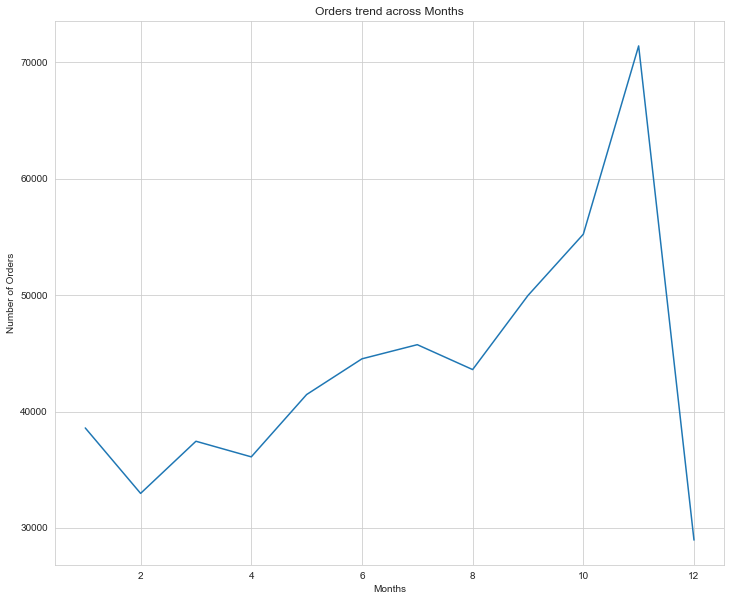

In [191]:
plt.subplots(figsize=(12,10))

plt.plot(ecd.groupby('Month')['InvoiceNo'].count())
plt.xlabel('Months')
plt.ylabel('Number of Orders')
plt.title('Orders trend across Months')

## 15. How much money spent by each country?

In [221]:
ecd.groupby('Country')['Amount_Spent'].sum().sort_values(ascending=False).round(1)

Country
United Kingdom          8979620.0
Netherlands              285446.3
EIRE                     283140.5
Germany                  228678.4
France                   209625.4
Australia                138453.8
Spain                     61558.6
Switzerland               57067.6
Belgium                   41196.3
Sweden                    38367.8
Japan                     37416.4
Norway                    36165.4
Portugal                  33683.0
Finland                   22546.1
Singapore                 21279.3
Channel Islands           20440.5
Denmark                   18955.3
Italy                     17483.2
Hong Kong                 15483.0
Cyprus                    13502.8
Austria                   10198.7
Israel                     8129.4
Poland                     7334.6
Greece                     4760.5
Unspecified                4740.9
Iceland                    4310.0
Canada                     3666.4
USA                        3580.4
Malta                      2725.6
United

Text(0.5, 1.0, 'Money Spent by each Country')

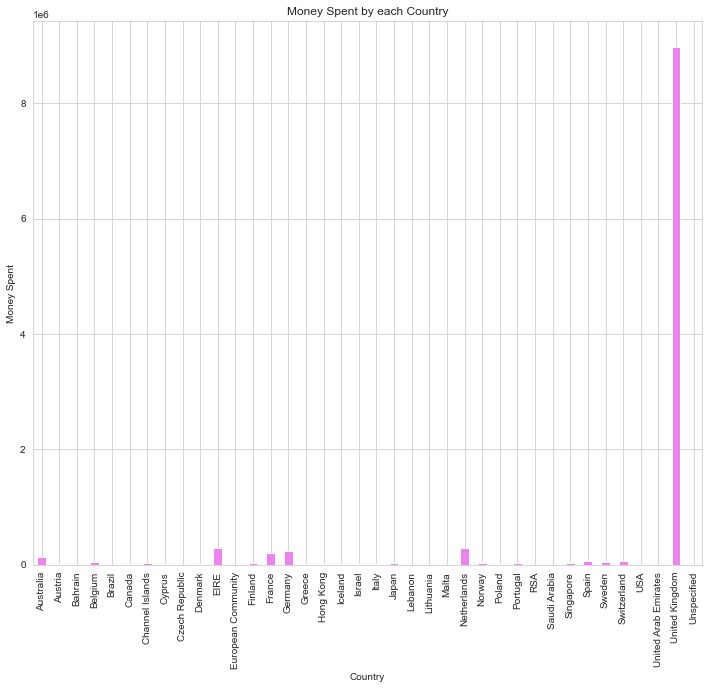

In [234]:
plt.subplots(figsize=(12,10))

ecd.groupby('Country')['Amount_Spent'].sum().plot.bar(color='violet')
plt.xlabel('Country')
plt.ylabel('Money Spent')
plt.title('Money Spent by each Country')